# Медианный фильтр

In [1]:
import cv2
import numpy as np
import statistics

In [2]:
img = cv2.imread('./lena.png')

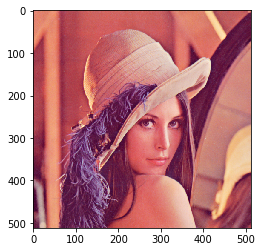

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(img[...,::-1])

In [4]:
img.shape

(512, 512, 3)

In [5]:
def median_filter(img, ksize):
    result = np.zeros_like(img)
    ks = np.arange(-ksize // 2 + 1., ksize // 2 + 1.)
    for channel in range(img.shape[-1]):
        for row in range(img.shape[0]):
            for col in range(img.shape[1]):
                window = list()
                for kr in ks:
                    cr = int(row + kr)
                    for kc in ks:
                        cc = int(col + kc) 
                        if cr>=0 and cc>=0 and cr<img.shape[0] and cc<img.shape[1]:
                            window.append(img[cr, cc, channel])

                result[row, col, channel] = statistics.median(window)
    return result

## Добавляем случайный шум на изображение

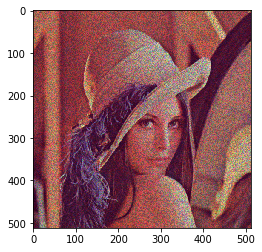

In [6]:
noisy_img = img.astype(float) + np.random.uniform(img.astype(float))
noisy_img = np.uint8(255. * np.abs(noisy_img) / np.max(np.abs(noisy_img)))
plt.imshow(noisy_img[...,::-1])

In [7]:
from ipywidgets import interact

def median_filter_show(ksize = 5):
    filtered = median_filter(noisy_img, ksize)
    return plt.imshow(filtered[...,::-1]);

interact(median_filter_show, ksize = (3, 21, 2));

interactive(children=(IntSlider(value=5, description='ksize', max=21, min=1, step=2), Output()), _dom_classes=…